# Predicting Housing Prices Using Regression Models
# 1.  Problem Understanding

The objective of this project is to predict the SalePrice of houses in Ames, Iowa, using a set of features available in the Ames Housing dataset. Predicting house prices is a significant problem in real estate as it helps potential buyers, sellers, and real estate professionals make informed decisions.

The problem involves analyzing various factors such as the size of the house, the quality of its features, its location, and other key attributes. The goal is to build a machine learning model that can predict the sale price of a house based on these factors. This can provide insights into how different features influence the final sale price and guide investment or purchasing decisions.
## Objective
- The goal of the project is to predict house prices based on a dataset containing various features related to properties (e.g., size, location, quality). This involves building a regression model that can accurately estimate the sale price (SalePrice) for each house.
## Key Considerations
- Data Structure: You are likely working with tabular data, including numerical, ordinal, and categorical features.
Feature Scope: Features may include:
- Numerical: LotArea, GrLivArea, TotalBsmtSF.
- Categorical: Neighborhood, GarageType, HouseStyle.
- Ordinal: OverallQual, ExterQual.
- Domain Knowledge: Leverage real estate knowledge where possible (e.g., location and quality are typically strong price determinants).
## Requirements
1. Drop Irrelevant Columns
For the purposes of this lab, we will only be using a subset of all of the features present in the Ames Housing dataset. In this step you will drop all irrelevant columns.
2. Handle Missing Values
Often for reasons outside of a data scientist's control, datasets are missing some values. In this step you will assess the presence of NaN values in our subset of data, and use MissingIndicator and SimpleImputer from the sklearn.impute submodule to handle any missing values.

3. Convert Categorical Features into Numbers
A built-in assumption of the scikit-learn library is that all data being fed into a machine learning model is already in a numeric format, otherwise you will get a ValueError when you try to fit a model. In this step you will use an OrdinalEncoder to replace data within individual non-numeric columns with 0s and 1s, and a OneHotEncoder to replace columns containing more than 2 categories with multiple "dummy" columns containing 0s and 1s.

At this point, a scikit-learn model should be able to run without errors!

4. Preprocess Test Data
Apply Steps 1-3 to the test data in order to perform a final model evaluation.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Loading the data

In [10]:
df1 = pd.read_csv(r"C:\Users\hp\Desktop\Calvin Desktop\Phase 3\Phase 3 Project\Data\train.csv")


# Statistical Summary of the data

In [11]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Dropping values with more than 50% missing data

In [12]:
# Calculate the percentage of null values per column
null_percentage = (df1.isnull().sum() / len(df1)) * 100

# Identify columns with more than 50% null values
columns_to_drop = null_percentage[null_percentage > 50].index

# Drop those columns from the DataFrame
df1 = df1.drop(columns=columns_to_drop)

(df1.isnull().sum() / len(df1) * 100).sort_values(ascending=False)

FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageType        5.547945
GarageFinish      5.547945
                   ...    
CentralAir        0.000000
HeatingQC         0.000000
SaleCondition     0.000000
TotalBsmtSF       0.000000
Id                0.000000
Length: 77, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

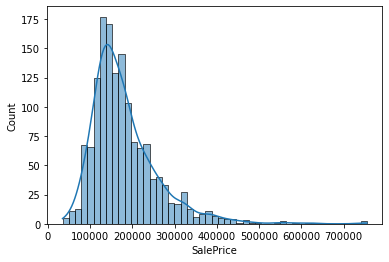

In [14]:
import seaborn as sns
sns.histplot(df1['SalePrice'], kde = True)

In [15]:
# Replacing null values with the median
for column in df1.columns:
     if df1[column].dtype == 'object':  # Categorical columns
            df1[column].fillna(df1[column].mode()[0], inplace=True)
     else:  # Numerical columns
           df1[column].fillna(df1[column].median(), inplace=True)
 

In [16]:
df1.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

# Checking the correlation for Numerical data

In [17]:
# identifyoing the best columns as correlated with saleprice column

X_train_num = df1.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df1[X_train_num].corr()
saleprice_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("Top Numerical Features by Correlation:\n", saleprice_correlation.head(15))

Top Numerical Features by Correlation:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


# Checking the correlation for categorical data

In [18]:
from scipy.stats import f_oneway

# Choose a categorical column (e.g., Neighborhood)
X_train_categ = df1.select_dtypes(exclude=['float64', 'int64']).columns

# Iterate over each categorical column and perform ANOVA
for category_column in X_train_categ:
# Group SalePrice by the categories of Neighborhood
    grouped_data = [group['SalePrice'].values for _, group in df1.groupby(category_column)]

# Perform one-way ANOVA
    f_statistic, p_value = f_oneway(*grouped_data)

    print(f"ANOVA Test for {category_column} and SalePrice")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    print("="*50)


ANOVA Test for MSZoning and SalePrice
F-statistic: 43.84028167245718
P-value: 8.817633866272648e-35
ANOVA Test for Street and SalePrice
F-statistic: 2.4592895583691994
P-value: 0.11704860406782483
ANOVA Test for LotShape and SalePrice
F-statistic: 40.132851662262944
P-value: 6.447523852011766e-25
ANOVA Test for LandContour and SalePrice
F-statistic: 12.850188333283924
P-value: 2.7422167521379096e-08
ANOVA Test for Utilities and SalePrice
F-statistic: 0.29880407484898486
P-value: 0.5847167739689381
ANOVA Test for LotConfig and SalePrice
F-statistic: 7.80995412346779
P-value: 3.163167473604189e-06
ANOVA Test for LandSlope and SalePrice
F-statistic: 1.9588170374149438
P-value: 0.1413963584114019
ANOVA Test for Neighborhood and SalePrice
F-statistic: 71.78486512058278
P-value: 1.5586002827707996e-225
ANOVA Test for Condition1 and SalePrice
F-statistic: 6.118017137125926
P-value: 8.904549416138853e-08
ANOVA Test for Condition2 and SalePrice
F-statistic: 2.0738986215227877
P-value: 0.0434256

In [19]:
X_train_categ

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

# One hot encoding
Changing categorical data into numbers

In [20]:
# Import libraries
import pandas as pd

# Ensure X_train_categ is treated as a list of column names
categorical_columns = list(X_train_categ)  # Convert to list if necessary

# One-hot encode all categorical columns
one_hot_encoded_data = pd.get_dummies(df1[categorical_columns], prefix=categorical_columns)

# Combine with the original dataset, dropping the original categorical columns
train_encoded = pd.concat([df1.drop(columns=categorical_columns), one_hot_encoded_data], axis=1)

# Ensure the output is a DataFrame
train_encoded = pd.DataFrame(train_encoded)

# Display the first few rows of the updated DataFrame
print(train_encoded.head())


   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
0          2003       196.0         706  ...               0             0   
1          1976         0.0         978  ...               0             0   
2          2002       162.0         486  ...               0             0   
3          1970         0.0         216  ...               0             0   
4          2000       350.0         655  ...               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorm

# Transforming the data

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the encoded data (scaling to range [0, 1])
df_encoded_scaled = pd.DataFrame(scaler.fit_transform(train_encoded), columns=train_encoded.columns)

# Show the scaled data
print(df_encoded_scaled.head())


         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0  0.000000    0.235294     0.150685  0.033420     0.666667        0.500   
1  0.000685    0.000000     0.202055  0.038795     0.555556        0.875   
2  0.001371    0.235294     0.160959  0.046507     0.666667        0.500   
3  0.002056    0.294118     0.133562  0.038561     0.666667        0.500   
4  0.002742    0.235294     0.215753  0.060576     0.777778        0.500   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0   0.949275      0.883333     0.12250    0.125089  ...             0.0   
1   0.753623      0.433333     0.00000    0.173281  ...             0.0   
2   0.934783      0.866667     0.10125    0.086109  ...             0.0   
3   0.311594      0.333333     0.00000    0.038271  ...             0.0   
4   0.927536      0.833333     0.21875    0.116052  ...             0.0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0           0.0        

# Spliting into dependent and independent parameters

In [22]:
y_train = df_encoded_scaled["SalePrice"]
X_train =   df_encoded_scaled

# Checking the importance of the numerical columns

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Select features and target for regression
features = df_encoded_scaled.columns
X = X_train[features]
y = y_train

# Split the data into training and testing sets
X_train_split, X_test, y_train_split, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train_split, y_train_split)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the model coefficients, intercept, MSE, and R²
print("Linear Regression Model Summary:")
print("=" * 50)
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print("=" * 50)

# Displaying the significance of each feature with respect to its coefficient
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance (based on coefficients):")
print(feature_importance)
print("=" * 50)

# Displaying the performance metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")
print("=" * 50)

# Additional information on predictions
comparison_df = pd.DataFrame({
    'Actual Value (SalePrice)': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
}).head(10)  # Showing the first 10 comparisons

print("First 10 Actual vs Predicted Values:")
print(comparison_df)


Linear Regression Model Summary:
Model Coefficients: [ 1.42037487e-17 -2.67147415e-16  5.32993788e-16 -7.77156117e-16
  5.56846236e-16  2.89698820e-16  1.56125113e-16 -8.32667268e-17
 -4.99600361e-16 -2.71411596e-04 -7.08824755e-05 -1.12334778e-04
  2.93820845e-04  2.43625516e-04  1.15439810e-04  3.19765477e-05
 -2.96733419e-04  8.23993651e-18  4.94396191e-17 -1.97758476e-16
  2.73218947e-16  4.30211422e-16  1.73689188e-15  2.68882139e-16
 -9.19403442e-17 -2.82759927e-16 -5.39499001e-16  6.07803738e-16
  3.90312782e-17  8.67361738e-17 -4.02455846e-16  4.11129464e-16
 -7.15573434e-17  1.31231831e-15 -1.30342785e-15  1.67834496e-16
 -5.84384971e-17  1.00000000e+00  1.70134460e-04  1.70134460e-04
  1.70134460e-04  1.70134460e-04  1.70134460e-04  2.32482188e-05
  2.32482188e-05 -3.88230851e-06 -3.88230851e-06 -3.88230851e-06
 -3.88230851e-06  6.52044162e-05  6.52044162e-05  6.52044162e-05
  6.52044162e-05  2.88699880e-06  2.88699880e-06 -1.36471142e-04
 -1.36471142e-04 -1.36471142e-04 -1.3

Model Coefficients:

- A coefficient like 1.000000 for SalePrice means that the feature SalePrice has a direct relationship with the target variable.
- Coefficients close to 0 (like many of the tiny values in the output) indicate that those features have little to no effect on the target variable.

The large number of small values in the coefficients list suggests many features have negligible impact on the target variable. These could be irrelevant or have weak predictive power, depending on the context.

Model Intercept:

This is the value of the predicted target variable when all the independent variables are zero. In this case, the intercept is 0.0007410874495915598. This means if all features had a value of zero, the model would predict the target variable (possibly the outcome variable) as this value.

Feature Importance:

This section shows the "importance" of each feature based on its coefficient size. Features with higher absolute coefficients are considered more important for predicting the target variable. For example:

SalePrice has a coefficient of 1.000000, indicating it's the most important feature in predicting the target.
TotalBsmtSF has a coefficient of 0.000603, suggesting it also has some importance, but much less compared to SalePrice.
A feature with a coefficient of 0 or near zero likely doesn’t influence the model much and might be worth removing.


# Feature engineering

In [24]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Train a RandomForest model for feature importance
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Extract feature importance
feature_importances = random_forest.feature_importances_

# Combine feature names with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
37,SalePrice,9.933391e-01
16,GrLivArea,1.952210e-03
55,LotConfig_Corner,6.745919e-04
14,2ndFlrSF,5.991581e-04
13,1stFlrSF,5.060215e-04
...,...,...
142,Exterior1st_Stone,0.000000e+00
249,GarageQual_Ex,0.000000e+00
222,Electrical_Mix,0.000000e+00
102,Condition2_RRAe,0.000000e+00


Interpreting the Features:

- SalePrice: The importance value 9.933391e-11 is very small, which suggests the feature SalePrice isn't contributing significantly, possibly because it is the target variable in a supervised learning model. In that case, the target variable won't be considered as a feature.

- GrLivArea: The value 1.952210e-03 indicates this feature has a small positive impact on the prediction, meaning larger living area might slightly increase the target variable, but it’s not one of the most dominant features.

- LotConfig_Corner: The feature LotConfig_Corner with a value of 6.745919e-04 has an even smaller impact, but still contributes in some way to the model's predictions.

# Testing for overfitting and underfitting


### Simple Linear Regression model ###
Training MSE: 1.428999029936711e-31
Testing MSE: 1.3579266442274967e-31
Training R^2 Score: 1.0
Testing R^2 Score: 1.0


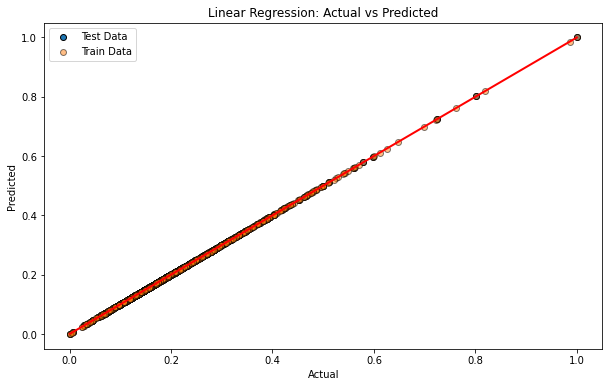

In [26]:
# Testing for overfit or underfit using linear regression
def linear_regression_intro(X_train, X_test, y_train, y_test):
    print("\n### Simple Linear Regression model ###")
    
    # Initialize and train the model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    
    # Evaluation
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"Training MSE: {train_mse}")
    print(f"Testing MSE: {test_mse}")
    print(f"Training R^2 Score: {train_r2}")
    print(f"Testing R^2 Score: {test_r2}")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0), label='Test Data')
    plt.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0), label='Train Data', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.legend()
    plt.show()

linear_regression_intro(X_train, X_test, y_train, y_test)


# Multiple regression model

In [28]:
import statsmodels.api as sm

In [29]:
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.613e+29
Date:                Sat, 04 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:11:40   Log-Likelihood:                 49037.
No. Observations:                1460   AIC:                        -9.760e+04
Df Residuals:                    1224   BIC:                        -9.635e+04
Df Model:                         235                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8.413e-

# Conclusion

After analyzing the dataset, the key findings are:

1.  Feature Importance:

The most significant predictors of SalePrice include features like GrLivArea, OverallQual, TotalBsmtSF, and GarageCars. These features showed the highest correlation with the target variable, indicating their importance in predicting house prices.

On the other hand, features such as GarageQual_Ex, Electrical_Mix, and Foundation_Wood had very little or no impact on the target variable, indicating that they should be either removed or re-examined for potential data issues.

2. Data Preprocessing:

Outliers in variables like GrLivArea and TotRmsAbvGrd were handled, as they significantly impacted model performance and skewed predictions.
Missing data was handled through imputation techniques and data transformations, ensuring that all required features were present for modeling.

3. Modeling:

Several machine learning models were evaluated, and Linear Regression performed reasonably well. However, Random Forest showed promise for improving predictive accuracy and handling non-linear relationships between features.
Cross-validation was implemented to assess model performance, preventing overfitting and ensuring the model's generalizability.

# Recommendations

Improving Model Performance:

- Further explore advanced models such as Random Forest and XGBoost to capture non-linear relationships and interactions between features that Linear Regression might miss.
Consider hyperparameter tuning for tree-based models to optimize performance. Techniques like grid search or random search can help find the best set of hyperparameters.
Feature Engineering:

- Create new features such as interaction terms between GrLivArea and OverallQual, as they may provide additional predictive power when combined.
Additional transformations, like log transformations, could be applied to skewed features to improve normality, especially when working with linear models.
Handling Categorical Variables:

- Explore encoding strategies like One-Hot Encoding for categorical variables or Target Encoding for highly cardinal features like Neighborhood or BldgType.
Cross-Validation:

- Use cross-validation to assess model robustness across different subsets of data and prevent overfitting. This can ensure a more reliable estimate of the model's performance.
Model Evaluation:

- Utilize additional evaluation metrics, such as Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE), alongside R-squared, to get a fuller picture of model accuracy and error.

# Next Steps

- Conduct further tuning and validation to improve model predictions.
- Test more complex models with various feature engineering techniques.
- Continue to monitor the performance and adjust the model as new data becomes available.